In [2]:
import pandas as pd
import geopandas as gpd

import requests

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import haversine as hs

import glob

import contextily as ctx

from datetime import datetime, date, time

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)

from convertbng.util import convert_lonlat

tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
msoa_cropped = gpd.read_file('../data/output.msoa_cropped.geojson')

## Independent variables

1. Demographic characteristics

* resident population
* working population
* index of multiple deprivation

2. public transport and road network

* bus stops density
* underground density
* bike docks density (total number of bikes available) 

* street network centrality measures (connectivity) – average for spatial unit
* street length

3. land use/built environment/POI

* offices: number of office spaces
* shopping services: number of supermarkets, groceries etc
* n of pubs (closed during lockdown)
* n of restaurants & cafes
* n of health services: clinics, surgeries
* n of Hairdressing/Beauty Salons
* n of Banks/Insurance/Building Society Offices & Other A2 Uses
* n of non-commercial/community

* share of vacant hereditaments


* n of POIs/tourist attractions (OSM)
* % of green/blue area from the total unit area


* high street or not (boolean) or % from total area

4. Environmental/weather

* temperature
* precipitation 

5. Fixed
* year
* day of week

* resident population

In [37]:
#GLA Housing-led Projection Results
#2018-based projections
# pop_url = 'https://data.london.gov.uk/download/housing-led-population-projections/a8413ae8-3d47-4199-ae94-ba1ae65dbc59/msoa_housing_led_2018_based.xlsx'
# population = pd.read_excel(pop_url,
#                           engine='openpyxl', sheet_name='Components of Change')
# population = population.loc[population.year==2018, ['gss_code_msoa','msoa_name','popn']]
# population.columns = ['MSOA11CD', 'msoa_name', 'popn']
# population.to_csv('../data/x/msoa_population2018.csv', index=False)
population = pd.read_csv('../data/x/msoa_population2018.csv')

* working population

In [38]:
# # employment data
# # queried from: https://www.nomisweb.co.uk/
# # All usual residents aged 16 to 74 in employment in the area the week before the census

# employment = pd.read_csv('../data/3631505.csv')
# employment = employment[employment['Area'].str.contains('msoa2011')]
# employment['Area'] = employment['Area'].str.replace('msoa2011:', '')
# employment.columns = ['msoa_name', 'MSOA11CD', 'employment_2011']
# employment.to_csv('../data/x/employment.csv', index=False)
employment = pd.read_csv('../data/x/employment.csv')

* index of multiple deprivation

In [39]:
# #deprivation

# d = gpd.read_file('../data/English_IMD_2019/IMD_2019.shp') #shapefile from cdrc
# depr_url = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/845345/File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.csv'

# deprivation = pd.read_csv(depr_url)
# deprivation.to_csv('../data/deprivation.csv', index=False)
# deprivation = pd.read_csv('../data/deprivation.csv')

# # larger – more deprived
# deprivation = deprivation[deprivation['Local Authority District code (2019)'].str.contains('E09')]
# deprivation = deprivation.merge(lsoa_to_msoa, how='left', left_on='LSOA code (2011)', right_on='LSOA11CD')
# deprivation_msoa = deprivation.groupby(['MSOA11CD']
#                    ).agg({'Index of Multiple Deprivation (IMD) Score':'mean'}).reset_index()
# deprivation_msoa.columns = ['MSOA11CD', 'IMD2019']
# deprivation_msoa.to_csv('../data/x/deprivation_msoa.csv', index=False)
deprivation = pd.read_csv('../data/x/deprivation_msoa.csv')

#### 2. Transport

* Bus stops density

In [40]:
# stops = gpd.read_file('../data/buses/bus_stops_locations.geojson')
# stops = stops.to_crs('epsg:27700')
# msoa_to_stops = gpd.sjoin(msoa, stops, how="inner", op="contains")
# msoa_to_stops = msoa_to_stops.groupby(['MSOA11CD']).agg({'Stop_Code_LBSL':'count'}).reset_index()
# msoa_to_stops.columns=['MSOA11CD','bus_stops_density']
# msoa_to_stops.to_csv('../data/x/msoa_to_stops.csv', index=False)
msoa_to_stops = pd.read_csv('../data/x/msoa_to_stops.csv')

* Bike stations density

In [12]:
# stations_gdf = gpd.read_file('../data/cycling/stations.geojson')
# stations_gdf = stations_gdf.to_crs('epsg:27700')
# msoa_to_stations = gpd.sjoin(msoa, stations_gdf, how="inner", op="contains")
# msoa_to_stations = msoa_to_stations.groupby(['MSOA11CD']).agg({'station_id':'count'}).reset_index()
# msoa_to_stations.columns=['MSOA11CD','bike_stations_density']
# msoa_to_stations.to_csv('../data/x/msoa_to_stations.csv', index=False)
msoa_to_stations = pd.read_csv('../data/x/msoa_to_stations.csv')

In [9]:
stations_gdf = gpd.read_file('../data/cycling/stations.geojson')
stations_gdf = stations_gdf.to_crs('epsg:27700')
msoa_to_stations = gpd.sjoin(msoa, stations_gdf, how="inner", op="contains")
msoa_to_stations = msoa_to_stations.groupby(['MSOA11CD']).agg({'station_id':'count'}).reset_index()
msoa_to_stations.columns=['MSOA11CD','bike_stations_density']
# msoa_to_stations.to_csv('../data/x/msoa_to_stations.csv', index=False)

In [ ]:
# msoa.merge(msoa_to_stations, how='inner').plot(column='bike_stations_density', legend=True);

<AxesSubplot:>

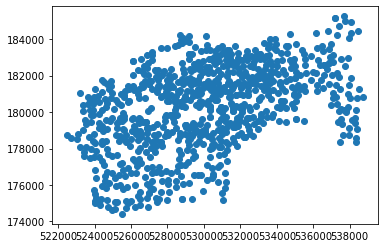

In [7]:
stations_gdf.plot()

array([[<AxesSubplot:title={'center':'bike_stations_density'}>]],
      dtype=object)

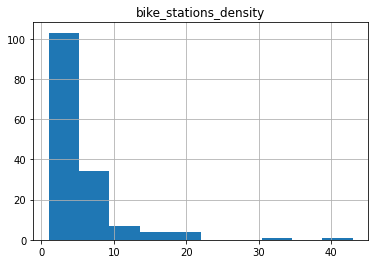

In [13]:
msoa_to_stations.hist()

In [42]:
# tourism = gpd.read_file('../data/osm_tourism.geojson')
# tourism = tourism[['id','name','tourism','type','geometry']]
# tourism = tourism[tourism['tourism'].isin(['attraction','gallery','museum','viewpoint'])]
# msoa_to_tourism = gpd.sjoin(msoa_cropped, tourism, how="inner", op="contains")
# # tourism_to_msoa = gpd.sjoin(tourism, msoa_cropped, how="inner", op="within")
# msoa_to_tourism = msoa_to_tourism.groupby(['MSOA11CD']).agg({'id':'count'}).reset_index()
# msoa_to_tourism.columns=['MSOA11CD','tourism_density']
# msoa_to_tourism.to_csv('../data/x/msoa_to_tourism.csv', index=False)
msoa_to_tourism = pd.read_csv('../data/x/msoa_to_tourism.csv')

In [43]:
# ldn_green_polys = gpd.read_file('../data/ldn_green_polys/ldn_green_polys.shp')
# msoa_cropped = msoa_cropped.to_crs('epsg:27700')
# intersected = gpd.overlay(ldn_green_polys, msoa_cropped, how='intersection')
# intersected['area'] = intersected.geometry.area
# msoa_greenery = intersected.groupby(by='MSOA11CD').area.sum().reset_index()
# msoa_greenery.columns = ['MSOA11CD', 'green_area']
# msoa_greenery.to_csv('../data/x/msoa_greenery.csv', index=False)
msoa_greenery = pd.read_csv('../data/x/msoa_greenery.csv')

In [44]:
# hs_path = '../data/retail/os_high_street_201903/geojson/great_britain/high_street_201903_building_geom.geojson'
# hs_buildings_polys = gpd.read_file(hs_path)
# hs_buildings_polys = hs_buildings_polys.to_crs('epsg:27700')
# intersected = gpd.overlay(hs_buildings_polys, msoa_cropped, how='intersection')
# intersected['area'] = intersected.geometry.area
# msoa_hs_area = intersected.groupby(by='MSOA11CD').area.sum().reset_index()
# msoa_hs_area.columns = ['MSOA11CD', 'hs_building_area']
# msoa_hs_area.to_csv('../data/x/msoa_hs_area.csv', index=False)
msoa_hs_area = pd.read_csv('../data/x/msoa_hs_area.csv')

### Combine into one dataset

In [29]:
msoa_cropped_df = msoa_cropped[['MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM']]

In [32]:
msoa201905

,MSOA11CD,arrivals201905
0,E02000001,67631
1,E02000183,2932
2,E02000184,4035
3,E02000186,4954
4,E02000187,5338
...,...,...
144,E02000983,4009
145,E02006801,23565
146,E02006802,5790
147,E02006853,1103


In [34]:
msoa_final = msoa_cropped_df.merge(msoa201905, how='left'
                                  ).merge(msoa202005, how='left'
                                         ).merge(msoa202105, how='left')
# msoa_final['arrivals201905'] = msoa_final['arrivals201905'].fillna(1)

In [45]:
msoa_final = msoa_final.merge(population, how='left').merge(employment, how='left'
                ).merge(deprivation, how='left').merge(msoa_to_stops, how='left').merge(msoa_to_stations, how='left')

In [46]:
msoa_to_network = pd.read_csv('../data/x/msoa_to_network.csv')
msoa_final = msoa_final.merge(msoa_to_network, how='left')
msoa_final['street_density'] = msoa_final['street_density']*100

In [47]:
msoa_final = msoa_final.merge(msoa_greenery, how='left').merge(msoa_to_tourism, how='left'
                                                              ).merge(msoa_hs_area, how='left')

In [48]:
msoa_final.shape

(154, 19)

In [ ]:
msoa_final = msoa_final[['MSOA11CD', 'popn',
       'employment_2011', 'IMD2019', 'street_length', 'median_ebc',
       'msoa_area', 'street_density', 'green_area', 'tourism_density',
       'hs_building_area']]

In [ ]:
msoa_final.columns = ['MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM', 'msoa_name', 'population', 'msoa_code',
       'employment', 'deprivation', 'street_length', 'median_ebc',
       'msoa_area', 'street_density', 'green_area', 'tourism_density',
       'hs_building_area']

In [15]:
# msoa_final.to_csv('../data/final_df_msoa.csv', index=False)
msoa_final = pd.read_csv('../data/final_df_msoa.csv')

In [1]:
msoa_to_categories202103 = pd.read_csv('msoa_to_categories202103.csv')
msoa_to_categories202003 = pd.read_csv('msoa_to_categories202003.csv')
msoa_to_categories201903 = pd.read_csv('msoa_to_categories201903.csv')
msoa_to_categories202006 = pd.read_csv('msoa_to_categories202006.csv')
msoa_to_categories201906 = pd.read_csv('msoa_to_categories201906.csv')